In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
df = pd.read_csv("/content/adult.csv")
df.columns = df.columns.str.replace(" ","")

In [3]:
df.head()

,age,workclass,fnlwgt,education,education.num,marital.status,occupation,relationship,race,sex,capital.gain,capital.loss,hours.per.week,native.country,income
0,90,?,77053,HS-grad,9,Widowed,?,Not-in-family,White,Female,0,4356,40,United-States,<=50K
1,82,Private,132870,HS-grad,9,Widowed,Exec-managerial,Not-in-family,White,Female,0,4356,18,United-States,<=50K
2,66,?,186061,Some-college,10,Widowed,?,Unmarried,Black,Female,0,4356,40,United-States,<=50K
3,54,Private,140359,7th-8th,4,Divorced,Machine-op-inspct,Unmarried,White,Female,0,3900,40,United-States,<=50K
4,41,Private,264663,Some-college,10,Separated,Prof-specialty,Own-child,White,Female,0,3900,40,United-States,<=50K


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32561 entries, 0 to 32560
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   age             32561 non-null  int64 
 1   workclass       32561 non-null  object
 2   fnlwgt          32561 non-null  int64 
 3   education       32561 non-null  object
 4   education.num   32561 non-null  int64 
 5   marital.status  32561 non-null  object
 6   occupation      32561 non-null  object
 7   relationship    32561 non-null  object
 8   race            32561 non-null  object
 9   sex             32561 non-null  object
 10  capital.gain    32561 non-null  int64 
 11  capital.loss    32561 non-null  int64 
 12  hours.per.week  32561 non-null  int64 
 13  native.country  32561 non-null  object
 14  income          32561 non-null  object
dtypes: int64(6), object(9)
memory usage: 3.7+ MB


In [5]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
age,32561.0,38.581647,13.640433,17.0,28.0,37.0,48.0,90.0
fnlwgt,32561.0,189778.366512,105549.977697,12285.0,117827.0,178356.0,237051.0,1484705.0
education.num,32561.0,10.080679,2.572720,1.0,9.0,10.0,12.0,16.0
capital.gain,32561.0,1077.648844,7385.292085,0.0,0.0,0.0,0.0,99999.0
capital.loss,32561.0,87.303830,402.960219,0.0,0.0,0.0,0.0,4356.0
hours.per.week,32561.0,40.437456,12.347429,1.0,40.0,40.0,45.0,99.0


In [6]:
# Is there missing data
df.isna().values.any()
# Check for missing values in each column
missing_values = df.isnull().sum()

# Display the number of missing values in each column
print(missing_values)

age               0
workclass         0
fnlwgt            0
education         0
education.num     0
marital.status    0
occupation        0
relationship      0
race              0
sex               0
capital.gain      0
capital.loss      0
hours.per.week    0
native.country    0
income            0
dtype: int64


In [7]:
for column_name in df.columns:
    print("Unique values in the {} column".format(column_name))
    print("{}".format(df[column_name].unique()), "\n")

Unique values in the age column
[90 82 66 54 41 34 38 74 68 45 52 32 51 46 57 22 37 29 61 21 33 49 23 59
 60 63 53 44 43 71 48 73 67 40 50 42 39 55 47 31 58 62 36 72 78 83 26 70
 27 35 81 65 25 28 56 69 20 30 24 64 75 19 77 80 18 17 76 79 88 84 85 86
 87] 

Unique values in the workclass column
['?' 'Private' 'State-gov' 'Federal-gov' 'Self-emp-not-inc' 'Self-emp-inc'
 'Local-gov' 'Without-pay' 'Never-worked'] 

Unique values in the fnlwgt column
[ 77053 132870 186061 ...  34066  84661 257302] 

Unique values in the education column
['HS-grad' 'Some-college' '7th-8th' '10th' 'Doctorate' 'Prof-school'
 'Bachelors' 'Masters' '11th' 'Assoc-acdm' 'Assoc-voc' '1st-4th' '5th-6th'
 '12th' '9th' 'Preschool'] 

Unique values in the education.num column
[ 9 10  4  6 16 15 13 14  7 12 11  2  3  8  5  1] 

Unique values in the marital.status column
['Widowed' 'Divorced' 'Separated' 'Never-married' 'Married-civ-spouse'
 'Married-spouse-absent' 'Married-AF-spouse'] 

Unique values in the occupation 

In [8]:
con_var=['age', 'fnlwgt', 'education.num','hours.per.week']

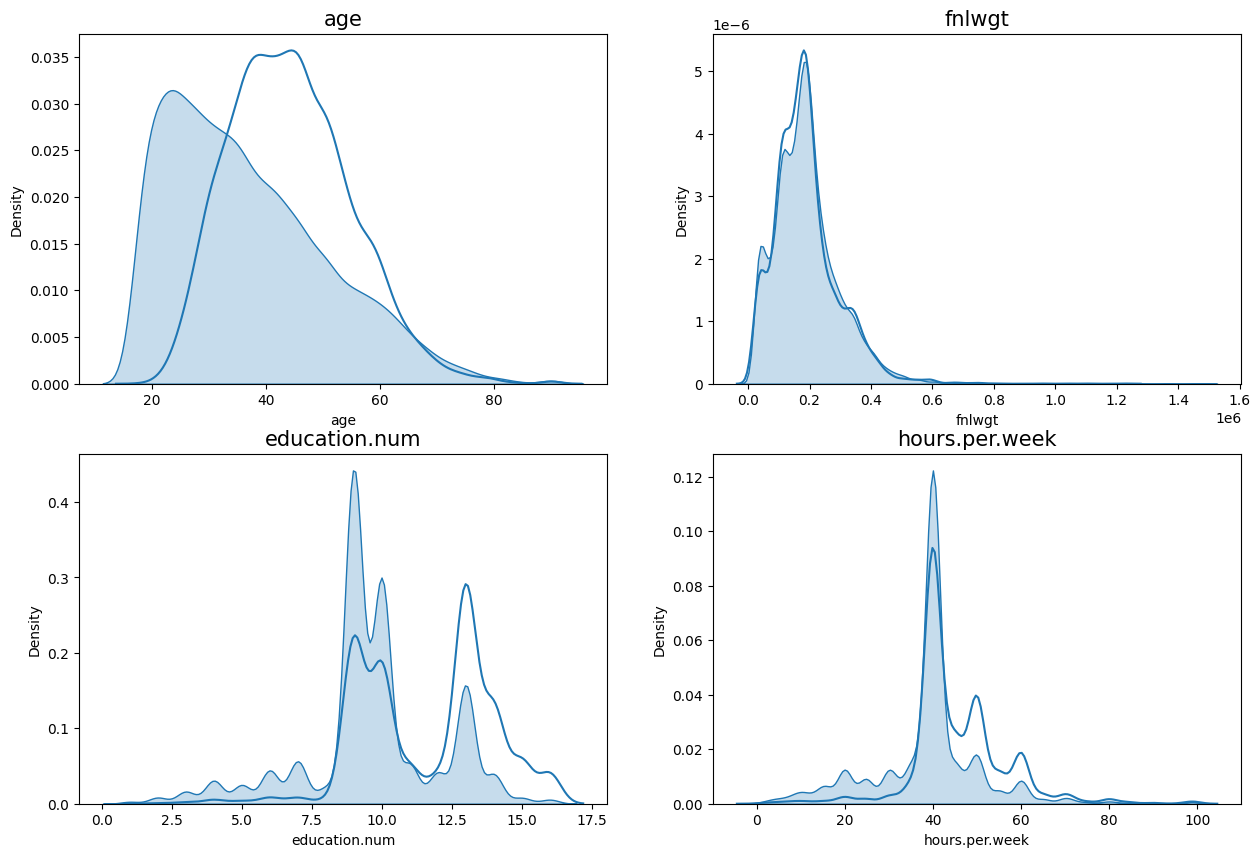

In [9]:
# Continuous Variables's Distribution Graphs about Income
plt.figure(figsize=(15,10))
plt.subplot(221)

i=0
for x in con_var:
    plt.subplot(2, 2, i+1)
    i += 1
    ax1=sns.kdeplot(df[df['income'] == '<=50K'][x], shade=True,label="income <=50K")
    sns.kdeplot(df[df['income'] == '>50K'][x], shade=False,label="income   >50K", ax=ax1)
    plt.title(x,fontsize=15)

plt.show()

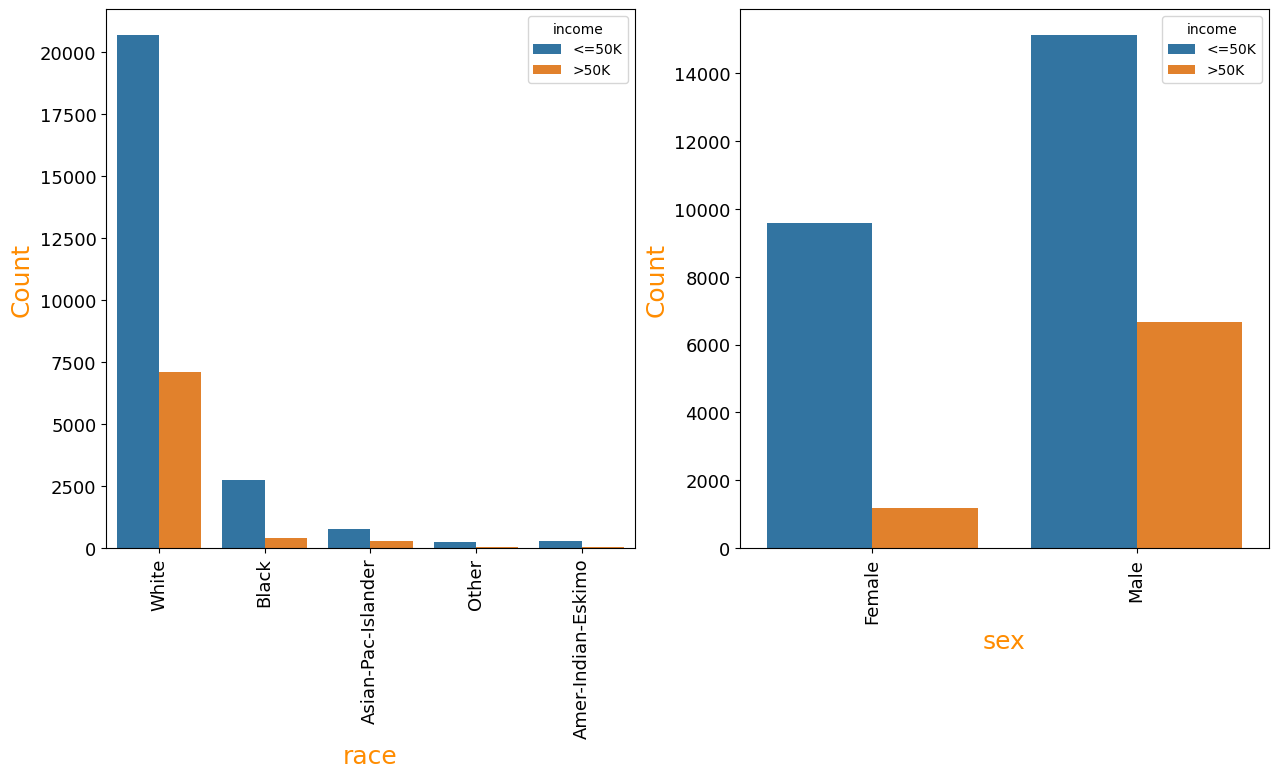

In [10]:
# Categorical Variables's Graphs by Count Plot about İncome
plt.figure(figsize=(15,7))

deg=["race","sex"]

for i in range(2):
    plt.subplot(1,2,i+1)
    sns.countplot(x=deg[i],data=df,hue='income')
    plt.xlabel(deg[i],color="darkorange",fontsize=18)
    plt.ylabel("Count",color="darkorange",fontsize=18)
    plt.yticks(fontsize=13)
    plt.xticks(rotation=90,fontsize=13)

plt.show()

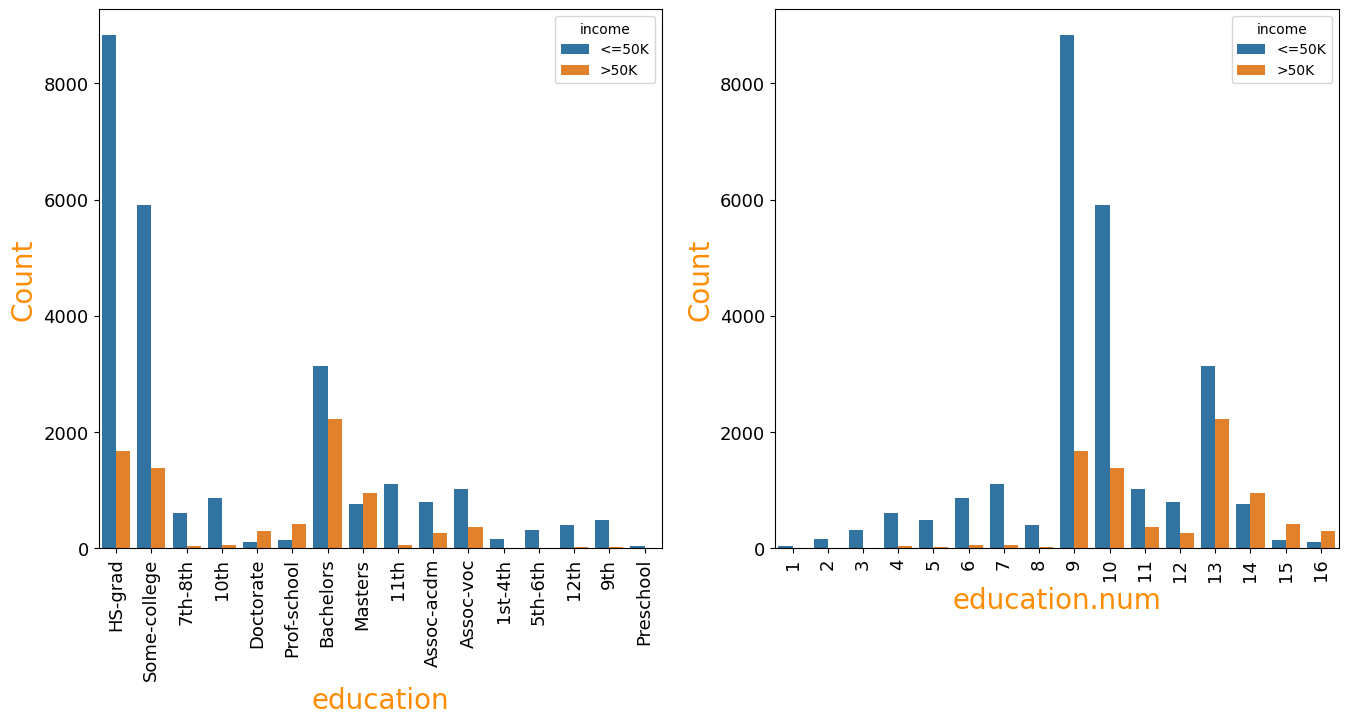

In [11]:
plt.figure(figsize=(16,7))

deg=["education","education.num"]

for i in range(2):
    plt.subplot(1,2,i+1)
    sns.countplot(x=deg[i],data=df,hue="income")
    plt.xlabel(deg[i],color="darkorange",fontsize=20)
    plt.ylabel("Count",color="darkorange",fontsize=20)
    plt.yticks(fontsize=13)
    plt.xticks(rotation=90,fontsize=13)

plt.show()

In [12]:
# Correlation Matrix between Numerical Values
list=['age','education.num',"hours.per.week","fnlwgt"]

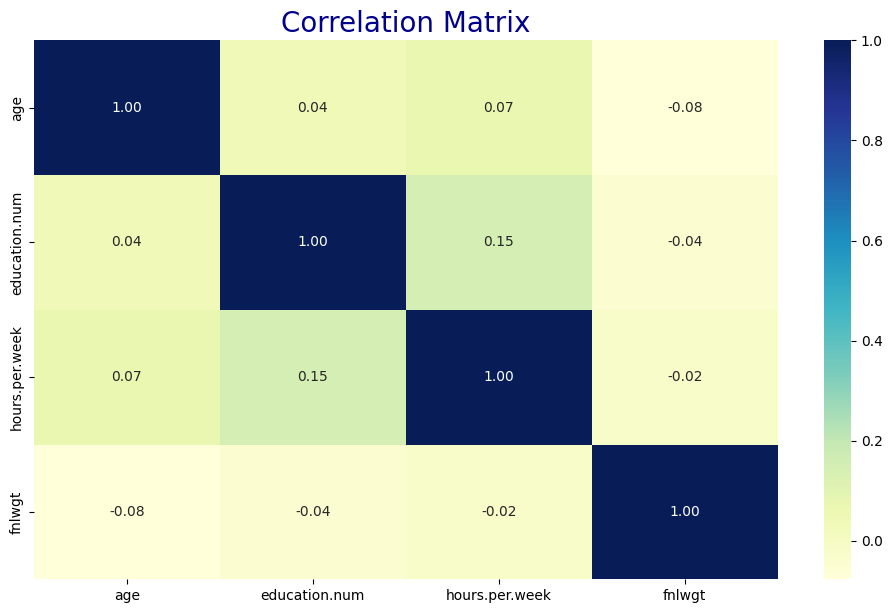

In [13]:
plt.figure(figsize=(12,7))
sns.heatmap(df[list].corr(),annot=True, fmt = ".2f", cmap = "YlGnBu")
plt.title("Correlation Matrix",color="darkblue",fontsize=20)
plt.show()

In [14]:
# Feature Engineering
df["woman?"]  = df.sex.replace({"Female":1,"Male":0})
df["income_"] = df.income.replace({"<=50K":0,">50K":1})

In [15]:
df1 = pd.get_dummies(df['workclass'])
df2 = pd.get_dummies(df["education"])
df3 = pd.get_dummies(df["marital.status"])
df4 = pd.get_dummies(df["occupation"])
df5 = pd.get_dummies(df["relationship"])
df6 = pd.get_dummies(df["race"])
df7 = pd.get_dummies(df["native.country"])

df  = pd.concat([df,df1,df2,df3,df4,df5,df6,df7],axis=1)

In [16]:
df.head()

,age,workclass,fnlwgt,education,education.num,marital.status,occupation,relationship,race,sex,...,Portugal,Puerto-Rico,Scotland,South,Taiwan,Thailand,Trinadad&Tobago,United-States,Vietnam,Yugoslavia
0,90,?,77053,HS-grad,9,Widowed,?,Not-in-family,White,Female,...,False,False,False,False,False,False,False,True,False,False
1,82,Private,132870,HS-grad,9,Widowed,Exec-managerial,Not-in-family,White,Female,...,False,False,False,False,False,False,False,True,False,False
2,66,?,186061,Some-college,10,Widowed,?,Unmarried,Black,Female,...,False,False,False,False,False,False,False,True,False,False
3,54,Private,140359,7th-8th,4,Divorced,Machine-op-inspct,Unmarried,White,Female,...,False,False,False,False,False,False,False,True,False,False
4,41,Private,264663,Some-college,10,Separated,Prof-specialty,Own-child,White,Female,...,False,False,False,False,False,False,False,True,False,False


In [17]:
from sklearn.preprocessing import LabelEncoder

# Define the columns to be encoded
categorical_columns = ['workclass', 'education', 'marital.status', 'occupation', 'relationship', 'race', 'sex', 'native.country']

# Copy the original DataFrame to avoid modifying it directly
df_encoded = df.copy()

# Initialize the LabelEncoder
labelencoder = LabelEncoder()

# Apply LabelEncoder to each categorical column
for column in categorical_columns:
    df_encoded[column] = labelencoder.fit_transform(df_encoded[column])

# Define y and X using the encoded DataFrame
y = df_encoded["income_"]
X = df_encoded[['age', 'workclass', 'fnlwgt', 'education', 'education.num', 'marital.status', 'occupation', 'relationship', 'race', 'sex', 'capital.gain', 'capital.loss', 'hours.per.week', 'native.country']]

In [18]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.20,random_state=42)

In [19]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import f1_score

model_1_predict_model = LogisticRegression(penalty='l2')
model_1_predict_model.fit(X_train,y_train)

predict_train_1 = model_1_predict_model.predict(X_train)
predict_test_1  = model_1_predict_model.predict(X_test)

In [20]:
from sklearn.metrics import confusion_matrix, classification_report, precision_recall_fscore_support, accuracy_score

# Accuracy
accuracy = accuracy_score(y_test, predict_test_1)
print("Accuracy: {:.2f}".format(accuracy))

# Confusion Matrix
conf_matrix = confusion_matrix(y_test, predict_test_1)
print("\nConfusion Matrix:")
print(conf_matrix)

# Classification Report
print("\nClassification Report:")
print(classification_report(y_test, predict_test_1))

# Precision, Recall, F-Score, Support
precision, recall, fscore, support = precision_recall_fscore_support(y_test, predict_test_1)

print("\nMetrics:")
print("Precision (Class 0): {:.2f}".format(precision[0]))
print("Precision (Class 1): {:.2f}".format(precision[1]))
print("Recall (Class 0): {:.2f}".format(recall[0]))
print("Recall (Class 1): {:.2f}".format(recall[1]))
print("F1-Score (Class 0): {:.2f}".format(fscore[0]))
print("F1-Score (Class 1): {:.2f}".format(fscore[1]))

# Specific Metrics for Class 1 (assuming it's the positive class)
tn, fp, fn, tp = conf_matrix.ravel()
print("\nConfusion Matrix Metrics (Class 1):")
print("True Positives (TP):", tp)
print("True Negatives (TN):", tn)
print("False Positives (FP):", fp)
print("False Negatives (FN):", fn)

Accuracy: 0.79

Confusion Matrix:
[[4711  265]
 [1111  426]]

Classification Report:
              precision    recall  f1-score   support

           0       0.81      0.95      0.87      4976
           1       0.62      0.28      0.38      1537

    accuracy                           0.79      6513
   macro avg       0.71      0.61      0.63      6513
weighted avg       0.76      0.79      0.76      6513


Metrics:
Precision (Class 0): 0.81
Precision (Class 1): 0.62
Recall (Class 0): 0.95
Recall (Class 1): 0.28
F1-Score (Class 0): 0.87
F1-Score (Class 1): 0.38

Confusion Matrix Metrics (Class 1):
True Positives (TP): 426
True Negatives (TN): 4711
False Positives (FP): 265
False Negatives (FN): 1111


In [21]:
# Example new data point
new_data_point = np.array([[25, 'Private', 120000, 'Bachelors', 13, 'Never-married', 'Prof-specialty', 'Not-in-family', 'White', 'Male', 0, 0, 40, 'United-States']])

# Encode the new data point using the same LabelEncoder
new_data_point_encoded = new_data_point.copy()

# Manually encoding categorical features as an example
new_data_point_encoded[0, 1] = labelencoder.fit_transform([new_data_point[0, 1]])[0]
new_data_point_encoded[0, 3] = labelencoder.fit_transform([new_data_point[0, 3]])[0]
new_data_point_encoded[0, 5] = labelencoder.fit_transform([new_data_point[0, 5]])[0]
new_data_point_encoded[0, 6] = labelencoder.fit_transform([new_data_point[0, 6]])[0]
new_data_point_encoded[0, 7] = labelencoder.fit_transform([new_data_point[0, 7]])[0]
new_data_point_encoded[0, 8] = labelencoder.fit_transform([new_data_point[0, 8]])[0]
new_data_point_encoded[0, 9] = labelencoder.fit_transform([new_data_point[0, 9]])[0]
new_data_point_encoded[0, 13] = labelencoder.fit_transform([new_data_point[0, 13]])[0]

# Convert the encoded data point to the correct data type
new_data_point_encoded = new_data_point_encoded.astype(float)

from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)  # Fit the scaler on the training data
new_data_point_scaled = scaler.transform(new_data_point_encoded)

# Predict the class for the new data point
y_pred_new = model_1_predict_model.predict(new_data_point_scaled)

# Output the prediction
print("Predicted class for the new data point:", y_pred_new)

Predicted class for the new data point: [1]


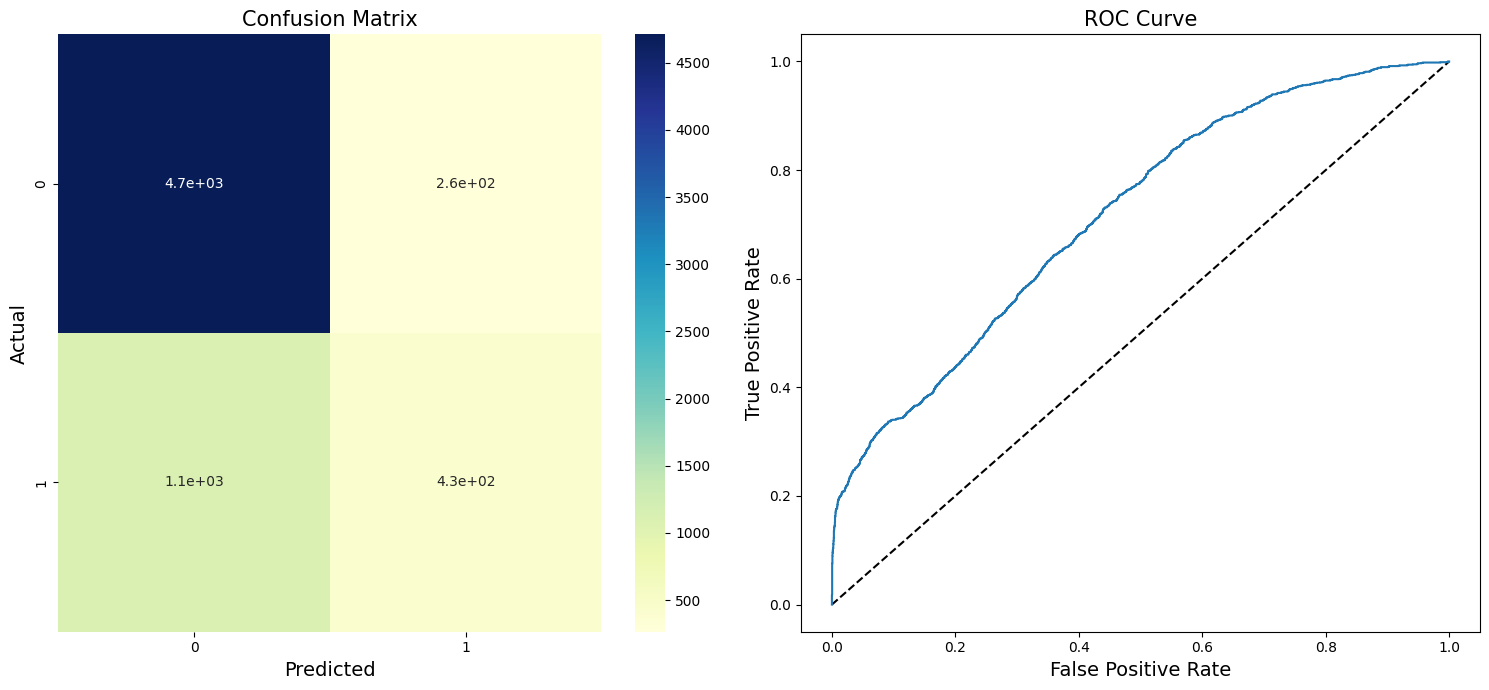


AUC Value: 0.72


In [22]:
from sklearn.metrics import roc_curve, confusion_matrix, roc_auc_score
# Calculate predicted probabilities for class 1
model_1_predict_test_proba = model_1_predict_model.predict_proba(X_test)[:, 1]

# Compute ROC curve
fpr, tpr, thresholds = roc_curve(y_test, model_1_predict_test_proba)

# Compute confusion matrix
confusion_matrix_test = confusion_matrix(y_test, predict_test_1)

# Plotting
plt.figure(figsize=(15, 7))

# Confusion Matrix plot
plt.subplot(1, 2, 1)
sns.heatmap(confusion_matrix_test, annot=True, cmap="YlGnBu")
plt.title("Confusion Matrix", fontsize=15)
plt.xlabel("Predicted", fontsize=14)
plt.ylabel("Actual", fontsize=14)

# ROC Curve plot
plt.subplot(1, 2, 2)
plt.plot([0, 1], [0, 1], 'k--')  # Diagonal 50% line
plt.plot(fpr, tpr)  # ROC curve
plt.xlabel('False Positive Rate', fontsize=14)
plt.ylabel('True Positive Rate', fontsize=14)
plt.title('ROC Curve', fontsize=15)

plt.tight_layout()  # Ensures plots are properly spaced
plt.show()

# Print AUC score
print("\nAUC Value: {:.2f}".format(roc_auc_score(y_test, model_1_predict_test_proba)))

In [23]:
from sklearn.feature_selection import RFE

# Initialize Logistic Regression model
logreg_model = LogisticRegression()

# Initialize RFE with 5 features to select (adjust as needed)
rfe = RFE(estimator=logreg_model, n_features_to_select=5, verbose=1)

# Fit RFE on training data
rfe.fit(X_train, y_train)

# Transform X_train and X_test to only include selected features
X_train_selected = rfe.transform(X_train)
X_test_selected = rfe.transform(X_test)

# Train Logistic Regression model on selected features
logreg_model.fit(X_train_selected, y_train)

# Predict on test set
predict_test_logreg = logreg_model.predict(X_test_selected)

# Evaluate performance
print("Logistic Regression Performance with RFE (5 features):")
print("Accuracy: {:.2f}".format(accuracy_score(y_test, predict_test_logreg)))
print("Confusion Matrix:\n", confusion_matrix(y_test, predict_test_logreg))
print("Classification Report:\n", classification_report(y_test, predict_test_logreg))

Fitting estimator with 14 features.
Fitting estimator with 13 features.
Fitting estimator with 12 features.
Fitting estimator with 11 features.
Fitting estimator with 10 features.
Fitting estimator with 9 features.
Fitting estimator with 8 features.
Fitting estimator with 7 features.
Fitting estimator with 6 features.
Logistic Regression Performance with RFE (5 features):
Accuracy: 0.81
Confusion Matrix:
 [[4644  332]
 [ 931  606]]
Classification Report:
               precision    recall  f1-score   support

           0       0.83      0.93      0.88      4976
           1       0.65      0.39      0.49      1537

    accuracy                           0.81      6513
   macro avg       0.74      0.66      0.68      6513
weighted avg       0.79      0.81      0.79      6513



In [24]:
from sklearn.ensemble import RandomForestClassifier
# Split data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=42)

# Initialize Random Forest classifier
model_2 = RandomForestClassifier(random_state=42)

# Fit the model on the training data
model_2.fit(X_train, y_train)

# Make predictions on training and test data
predict_train_2 = model_2.predict(X_train)
predict_test_2 = model_2.predict(X_test)

In [25]:
# Accuracy
accuracy = accuracy_score(y_test, predict_test_2)
print("Accuracy: {:.2f}".format(accuracy))

# Confusion Matrix
conf_matrix = confusion_matrix(y_test, predict_test_2)
print("\nConfusion Matrix:")
print(conf_matrix)

# Classification Report
print("\nClassification Report:")
print(classification_report(y_test, predict_test_2))

# Precision, Recall, F-Score, Support
precision, recall, fscore, support = precision_recall_fscore_support(y_test, predict_test_2)

print("\nMetrics:")
print("Precision (Class 0): {:.2f}".format(precision[0]))
print("Precision (Class 1): {:.2f}".format(precision[1]))
print("Recall (Class 0): {:.2f}".format(recall[0]))
print("Recall (Class 1): {:.2f}".format(recall[1]))
print("F1-Score (Class 0): {:.2f}".format(fscore[0]))
print("F1-Score (Class 1): {:.2f}".format(fscore[1]))

# Specific Metrics for Class 1 (assuming it's the positive class)
tn, fp, fn, tp = conf_matrix.ravel()
print("\nConfusion Matrix Metrics (Class 1):")
print("True Positives (TP):", tp)
print("True Negatives (TN):", tn)
print("False Positives (FP):", fp)
print("False Negatives (FN):", fn)


Accuracy: 0.85

Confusion Matrix:
[[4627  349]
 [ 604  933]]

Classification Report:
              precision    recall  f1-score   support

           0       0.88      0.93      0.91      4976
           1       0.73      0.61      0.66      1537

    accuracy                           0.85      6513
   macro avg       0.81      0.77      0.78      6513
weighted avg       0.85      0.85      0.85      6513


Metrics:
Precision (Class 0): 0.88
Precision (Class 1): 0.73
Recall (Class 0): 0.93
Recall (Class 1): 0.61
F1-Score (Class 0): 0.91
F1-Score (Class 1): 0.66

Confusion Matrix Metrics (Class 1):
True Positives (TP): 933
True Negatives (TN): 4627
False Positives (FP): 349
False Negatives (FN): 604


In [26]:
# Example new data point
new_data_point = np.array([[25, 'Private', 120000, 'Bachelors', 13, 'Never-married', 'Prof-specialty', 'Not-in-family', 'White', 'Male', 0, 0, 40, 'United-States']])

# Encode the new data point using the same LabelEncoder
new_data_point_encoded = new_data_point.copy()

# Manually encoding categorical features as an example
new_data_point_encoded[0, 1] = labelencoder.fit_transform([new_data_point[0, 1]])[0]
new_data_point_encoded[0, 3] = labelencoder.fit_transform([new_data_point[0, 3]])[0]
new_data_point_encoded[0, 5] = labelencoder.fit_transform([new_data_point[0, 5]])[0]
new_data_point_encoded[0, 6] = labelencoder.fit_transform([new_data_point[0, 6]])[0]
new_data_point_encoded[0, 7] = labelencoder.fit_transform([new_data_point[0, 7]])[0]
new_data_point_encoded[0, 8] = labelencoder.fit_transform([new_data_point[0, 8]])[0]
new_data_point_encoded[0, 9] = labelencoder.fit_transform([new_data_point[0, 9]])[0]
new_data_point_encoded[0, 13] = labelencoder.fit_transform([new_data_point[0, 13]])[0]

# Convert the encoded data point to the correct data type
new_data_point_encoded = new_data_point_encoded.astype(float)

from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)  # Fit the scaler on the training data
new_data_point_scaled = scaler.transform(new_data_point_encoded)

# Predict the class for the new data point
y_pred_new = model_1_predict_model.predict(new_data_point_scaled)

# Output the prediction
print("Predicted class for the new data point:", y_pred_new)

Predicted class for the new data point: [1]


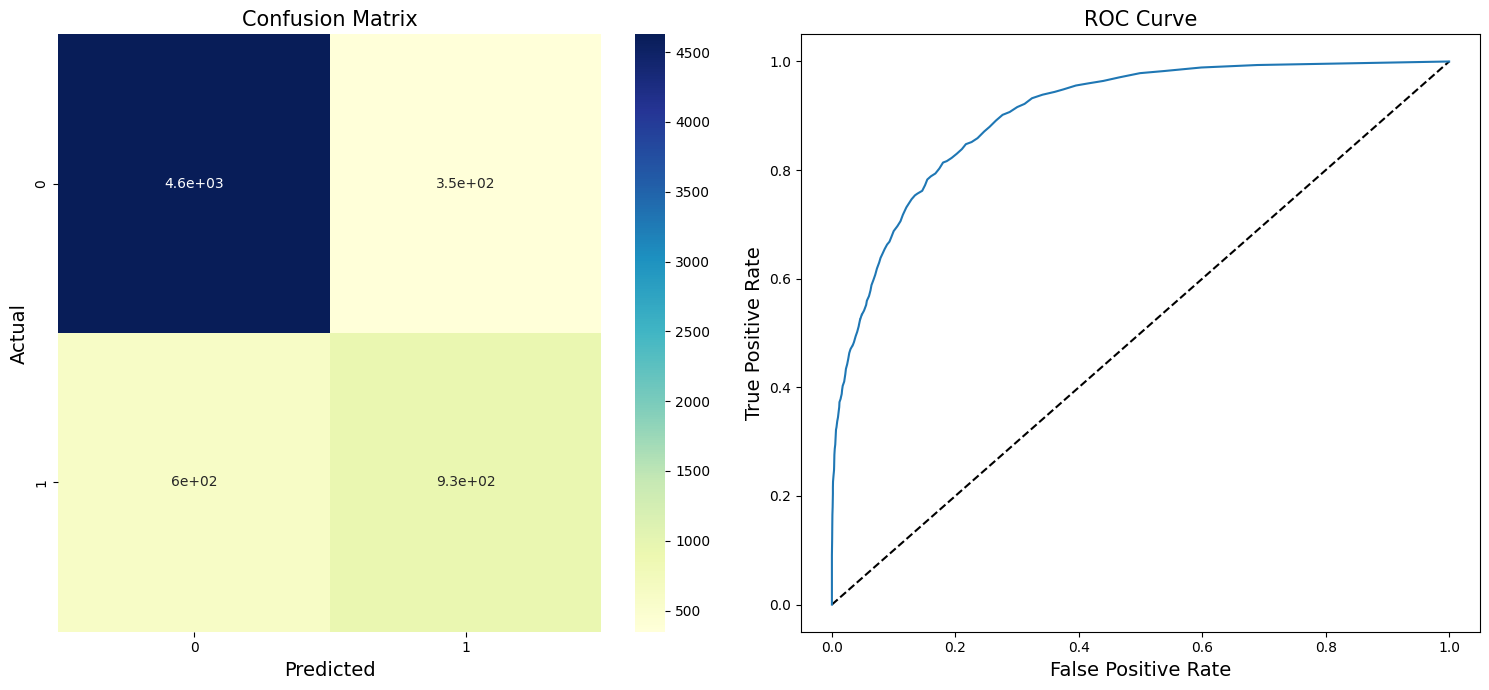


AUC Value: 0.90


In [27]:
# Calculate predicted probabilities for class 1
model_2_predict_test_proba = model_2.predict_proba(X_test)[:, 1]

# Compute ROC curve
fpr, tpr, thresholds = roc_curve(y_test, model_2_predict_test_proba)

# Compute confusion matrix
confusion_matrix_test = confusion_matrix(y_test, predict_test_2)

# Plotting
plt.figure(figsize=(15, 7))

# Confusion Matrix plot
plt.subplot(1, 2, 1)
sns.heatmap(confusion_matrix_test, annot=True, cmap="YlGnBu")
plt.title("Confusion Matrix", fontsize=15)
plt.xlabel("Predicted", fontsize=14)
plt.ylabel("Actual", fontsize=14)

# ROC Curve plot
plt.subplot(1, 2, 2)
plt.plot([0, 1], [0, 1], 'k--')  # Diagonal 50% line
plt.plot(fpr, tpr)  # ROC curve
plt.xlabel('False Positive Rate', fontsize=14)
plt.ylabel('True Positive Rate', fontsize=14)
plt.title('ROC Curve', fontsize=15)

plt.tight_layout()  # Ensures plots are properly spaced
plt.show()

# Print AUC score
print("\nAUC Value: {:.2f}".format(roc_auc_score(y_test, model_2_predict_test_proba)))

In [28]:
from sklearn.feature_selection import RFE

# Initialize Random Forest model
rf_model = RandomForestClassifier(random_state=42)

# Initialize RFE with 5 features to select (adjust as needed)
rfe_rf = RFE(estimator=rf_model, n_features_to_select=5, verbose=1)

# Fit RFE on training data
rfe_rf.fit(X_train, y_train)

# Transform X_train and X_test to only include selected features
X_train_selected_rf = rfe_rf.transform(X_train)
X_test_selected_rf = rfe_rf.transform(X_test)

# Train Random Forest model on selected features
rf_model.fit(X_train_selected_rf, y_train)

# Predict on test set
predict_test_rf = rf_model.predict(X_test_selected_rf)

# Evaluate performance
print("Random Forest Performance with RFE (5 features):")
print("Accuracy: {:.2f}".format(accuracy_score(y_test, predict_test_rf)))
print("Confusion Matrix:\n", confusion_matrix(y_test, predict_test_rf))
print("Classification Report:\n", classification_report(y_test, predict_test_rf))

Fitting estimator with 14 features.
Fitting estimator with 13 features.
Fitting estimator with 12 features.
Fitting estimator with 11 features.
Fitting estimator with 10 features.
Fitting estimator with 9 features.
Fitting estimator with 8 features.
Fitting estimator with 7 features.
Fitting estimator with 6 features.
Random Forest Performance with RFE (5 features):
Accuracy: 0.82
Confusion Matrix:
 [[4464  512]
 [ 661  876]]
Classification Report:
               precision    recall  f1-score   support

           0       0.87      0.90      0.88      4976
           1       0.63      0.57      0.60      1537

    accuracy                           0.82      6513
   macro avg       0.75      0.73      0.74      6513
weighted avg       0.81      0.82      0.82      6513

